# The dataset that will be used below is <em> IBM HR dataset</em>. We will use the dataset to predict the Job Satisfaction for an employee and find the most important parameters to help increase Job Satisfaction of an employee.

First, we import some libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [2]:
data = pd.read_csv("NEU/data/IBMHRData.csv") #read the data file

C:\Users\Karti\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5,8,13,17,19,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,37.0,Voluntary Resignation,Travel_Rarely,807.0,Human Resources,6,4.0,Human Resources,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,37.0,Voluntary Resignation,Travel_Rarely,807.0,Human Resources,6,4.0,Marketing,1,4,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,37.0,Voluntary Resignation,Travel_Rarely,807.0,Human Resources,6,4.0,Human Resources,1,5,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


## 1. Data Cleaning

In [4]:
data.isnull().sum(axis=0) #checking if there is anything missing in data (missing summary column-wise)

Age                          3
Attrition                   13
BusinessTravel               8
DailyRate                   12
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EmployeeNumber               1
Application ID               3
EnvironmentSatisfaction      9
Gender                      10
HourlyRate                   9
JobInvolvement               9
JobLevel                     7
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               14
MonthlyRate                 11
NumCompaniesWorked           9
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating           10
RelationshipSatisfaction     8
StandardHours               10
StockOptionLevel             9
TotalWorkingYears            8
TrainingTimesLastYear       11
WorkLifeBalance             10
YearsAtC

In [5]:
data.dropna(inplace=True) #listwise deletion -> drop all rows that have a missing value

There are many ways of handling missing data. Different scenarios call for usage of different imputation techniques. For this case, the simplest form has been used (listwise deletion). To know more about other ways, read:
https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4

In [6]:
data.isnull().sum(axis=0) # verify the above operation

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
Application ID              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

In [7]:
data.describe()

,Age,DailyRate,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,23299.000000,23299.000000,23299.000000,23299.000000,23299.000000,23299.000000,23299.000000,23299.000000,23299.000000,23299.000000,23299.0,23299.000000,23299.000000,23299.000000,23299.000000,23299.000000,23299.000000,23299.000000,23299.000000
mean,36.897549,802.654191,2.909824,2.719816,2.728529,2.064810,14326.072063,2.691575,3.155286,2.711876,80.0,0.792437,11.268595,2.796558,2.760548,7.009872,4.227735,2.177433,4.124641
std,9.109502,403.204381,1.023787,1.095354,0.711613,1.106295,7105.481206,2.499357,0.362185,1.080835,0.0,0.849834,7.778810,1.289525,0.706077,6.131005,3.625269,3.211187,3.572304
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,2094.000000,0.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,1.000000,8053.000000,1.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,3.000000,3.000000,3.000000,2.000000,14242.000000,2.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,4.000000,4.000000,3.000000,3.000000,20467.000000,4.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.500000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,5.000000,4.000000,4.000000,5.000000,26999.000000,9.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
#drop unnecessary/similar columns
data=data.drop(['DailyRate', 'EmployeeCount','EmployeeNumber','Application ID','MonthlyRate','Over18','HourlyRate'], axis=1)

In [9]:
data.dtypes

Age                         float64
Attrition                    object
BusinessTravel               object
Department                   object
DistanceFromHome             object
Education                   float64
EducationField               object
EnvironmentSatisfaction     float64
Gender                       object
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction              object
MaritalStatus                object
MonthlyIncome                object
NumCompaniesWorked          float64
OverTime                     object
PercentSalaryHike            object
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOptionLevel            float64
TotalWorkingYears           float64
TrainingTimesLastYear       float64
WorkLifeBalance             float64
YearsAtCompany              float64
YearsInCurrentRole          float64
YearsSinceLastPromotion     

In [10]:
#study throught excel reveals two rows are corrupt .. hence removing them
i = data[(data.EnvironmentSatisfaction == 127249)].index
j = data[(data.EnvironmentSatisfaction == 129588)].index

<center>
<img src="NEU/ipynb.images/a1_excel.png" />
</center>

In [11]:
data.drop(i)
data.drop(j)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,Sales,1,2.0,Life Sciences,2.0,Female,3.0,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,37.0,Voluntary Resignation,Travel_Rarely,Human Resources,6,4.0,Human Resources,1.0,Female,3.0,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,Sales,1,2.0,Life Sciences,2.0,Female,3.0,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,37.0,Voluntary Resignation,Travel_Rarely,Human Resources,6,4.0,Marketing,1.0,Female,3.0,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,37.0,Voluntary Resignation,Travel_Rarely,Human Resources,6,4.0,Human Resources,1.0,Female,3.0,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23524,38.0,Current employee,Travel_Rarely,Research & Development,2,3.0,Life Sciences,4.0,Male,3.0,...,80.0,0.0,6.0,3.0,3.0,3.0,2.0,1.0,2.0,Company Website
23526,34.0,Current employee,Travel_Rarely,Research & Development,27,2.0,Medical,4.0,Female,3.0,...,80.0,0.0,9.0,3.0,3.0,3.0,2.0,1.0,2.0,Company Website
23529,55.0,Current employee,Non-Travel,Research & Development,8,1.0,Medical,4.0,Female,3.0,...,80.0,0.0,31.0,3.0,3.0,2.0,0.0,2.0,2.0,Recruit.net
23530,27.0,Current employee,Travel_Rarely,Research & Development,16,4.0,Technical Degree,4.0,Male,3.0,...,80.0,1.0,7.0,2.0,3.0,6.0,2.0,1.0,2.0,Company Website


In [16]:
data.dtypes #checking if all the numeric fields are the right datatype

Age                         float64
Attrition                    object
BusinessTravel               object
Department                   object
DistanceFromHome             object
Education                   float64
EducationField               object
EnvironmentSatisfaction     float64
Gender                       object
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction              object
MaritalStatus                object
MonthlyIncome                object
NumCompaniesWorked          float64
OverTime                     object
PercentSalaryHike            object
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOptionLevel            float64
TotalWorkingYears           float64
TrainingTimesLastYear       float64
WorkLifeBalance             float64
YearsAtCompany              float64
YearsInCurrentRole          float64
YearsSinceLastPromotion     

In [17]:
data["DistanceFromHome"] = pd.to_numeric(data["DistanceFromHome"])
data["JobSatisfaction"] = pd.to_numeric(data["JobSatisfaction"])
data["MonthlyIncome"] = pd.to_numeric(data["MonthlyIncome"])
data["PercentSalaryHike"] = pd.to_numeric(data["PercentSalaryHike"])

In [18]:
data.dtypes

Age                         float64
Attrition                    object
BusinessTravel               object
Department                   object
DistanceFromHome            float64
Education                   float64
EducationField               object
EnvironmentSatisfaction     float64
Gender                       object
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction             float64
MaritalStatus                object
MonthlyIncome               float64
NumCompaniesWorked          float64
OverTime                     object
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOptionLevel            float64
TotalWorkingYears           float64
TrainingTimesLastYear       float64
WorkLifeBalance             float64
YearsAtCompany              float64
YearsInCurrentRole          float64
YearsSinceLastPromotion     

In [19]:
data = pd.get_dummies(data) #converting object datatype i.e., categorical values to numeric

## 2)Data Exploration

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

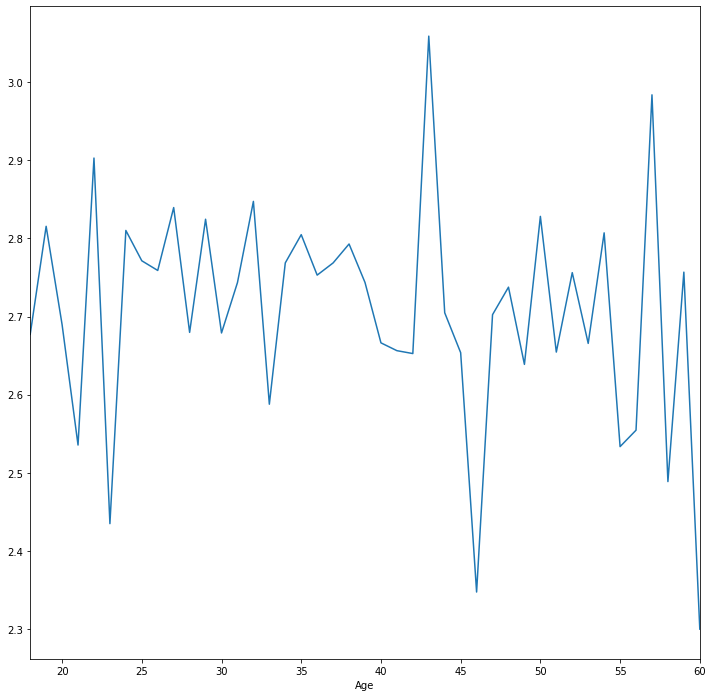

In [21]:
f, ax = plt.subplots(figsize= (12,12))
data.groupby(['Age'])['JobSatisfaction'].mean().plot()
plt.show()

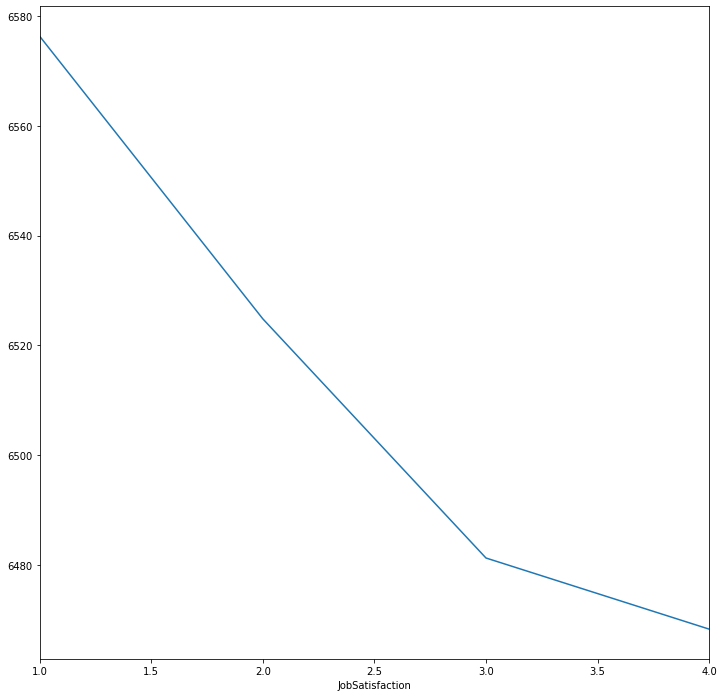

In [23]:
f, ax = plt.subplots(figsize= (12,12))
data.groupby(['JobSatisfaction'])['MonthlyIncome'].mean().plot()
plt.show()

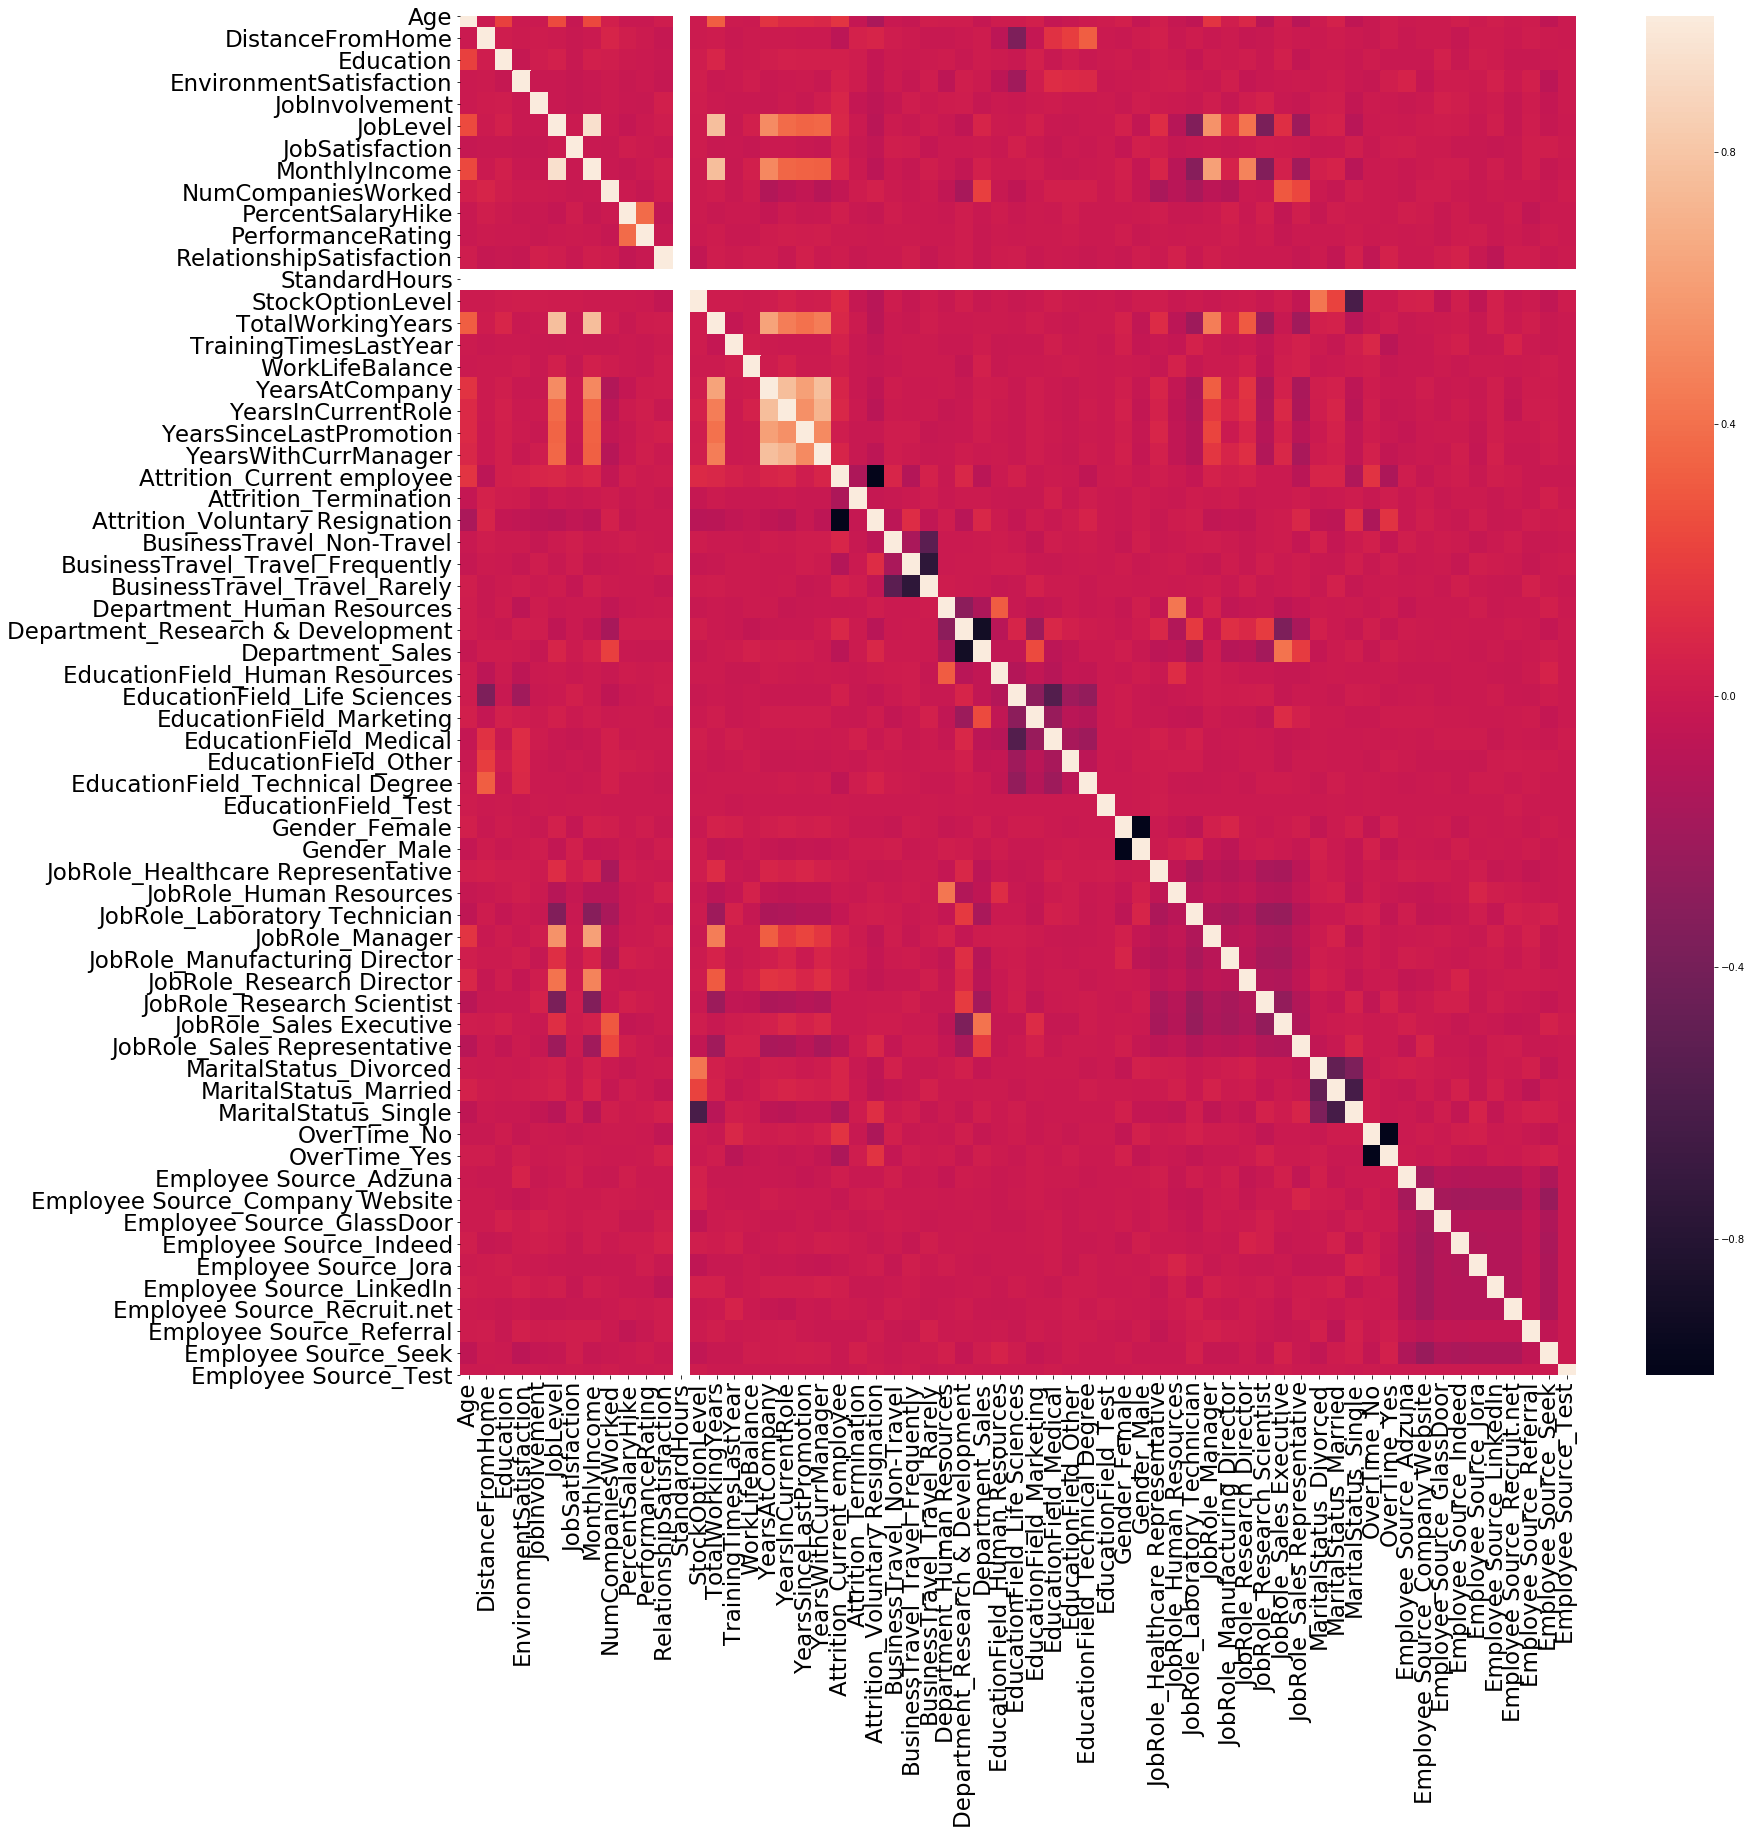

In [24]:
correlation = data.corr() 
f, ax = plt.subplots(figsize= (25,25))
sns.heatmap(correlation)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.show()

### The above correaltion matrix reveals alot about the correlation between the columns. For e.g., there is high correlation between:
<ul>
    <li> YearsAtCompany and YearsSinceLastPromotion </li>
    <li> Job Level & Total Working Years </li>
    <li> Monthly Income & Job level (duh!) </li>
</ul>

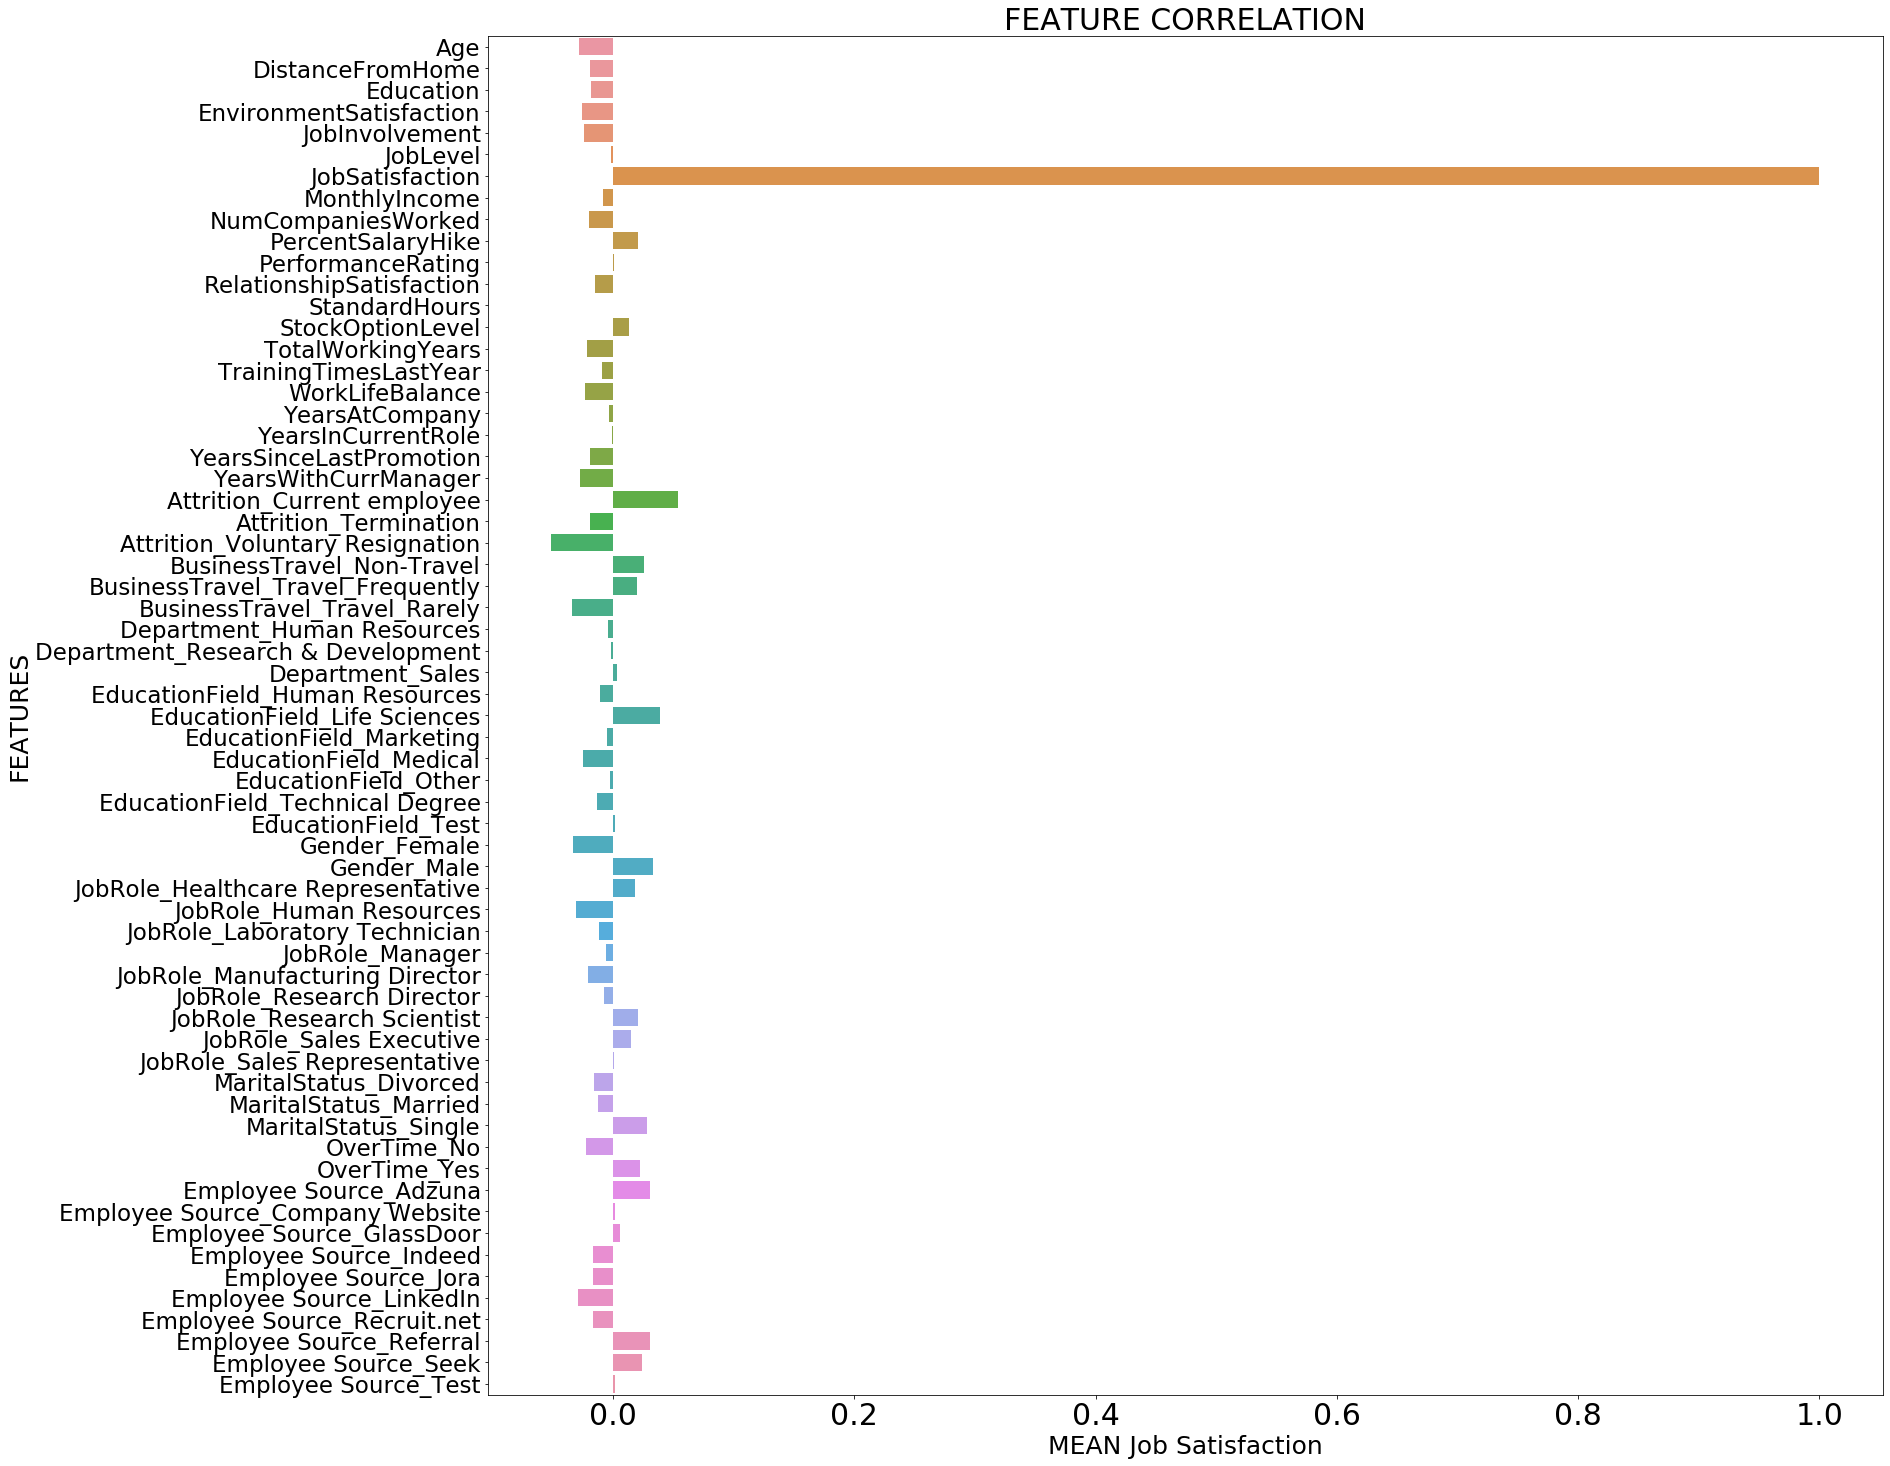

In [25]:
f, ax = plt.subplots(figsize= (25,25))
sns.barplot(x = correlation['JobSatisfaction'], y = correlation.index)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 23)
plt.ylabel('FEATURES', fontsize= 25)
plt.xlabel('MEAN Job Satisfaction', fontsize= 25)
plt.title('FEATURE CORRELATION', fontsize =30)
plt.show()

## 3) Modelling 
### a) RandomForest 
Have chosen to run the randomforest first to find out the topmost important parameters while predicting JobSatisfaction. Idea is to have reduced number of independent variables for future models. Also, its easy to run! 

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve, GridSearchCV
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [27]:
#define X and Y
X=data
y=X.pop("JobSatisfaction")

In [28]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X, y.values, test_size = 0.2,
                                                                             random_state = 65)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 100, random_state=65)

# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=65, verbose=0,
                      warm_start=False)

In [29]:
import numpy as np

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae) 
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.04


That means we only have an error of 0.04 while predicting Job Satisfaction. Pretty neat! Thank you RandomForest!

In [30]:
print(predictions)

[2.98 2.   3.98 ... 4.   3.   3.01]


In [31]:
print(test_labels)

[3. 2. 4. ... 4. 3. 3.]


In [32]:
feature_list = list(X.columns)
feature_list

['Age',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Attrition_Current employee',
 'Attrition_Termination',
 'Attrition_Voluntary Resignation',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'EducationField_Test',
 'Gender_Female',
 'Gender_Male',
 'JobRole_Healthcare Representative',
 'JobRole_Human R

In [33]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: MonthlyIncome        Importance: 0.13
Variable: PercentSalaryHike    Importance: 0.07
Variable: TotalWorkingYears    Importance: 0.07
Variable: Age                  Importance: 0.05
Variable: YearsAtCompany       Importance: 0.05
Variable: YearsWithCurrManager Importance: 0.05
Variable: DistanceFromHome     Importance: 0.04
Variable: RelationshipSatisfaction Importance: 0.04
Variable: TrainingTimesLastYear Importance: 0.04
Variable: YearsInCurrentRole   Importance: 0.04
Variable: YearsSinceLastPromotion Importance: 0.04
Variable: JobInvolvement       Importance: 0.03
Variable: WorkLifeBalance      Importance: 0.03
Variable: Education            Importance: 0.02
Variable: EnvironmentSatisfaction Importance: 0.02
Variable: StockOptionLevel     Importance: 0.02
Variable: JobLevel             Importance: 0.01
Variable: NumCompaniesWorked   Importance: 0.01
Variable: Department_Sales     Importance: 0.01
Variable: Gender_Female        Importance: 0.01
Variable: Gender_Male        

So basically to change the Job Satisfaction of an employee, we need to focus on Monthly Income, Percentage Salary Hike, Emplyee's age, etc. What we <strong> do not </strong> need to focus on is their Job Role, Source of hire, Business travel frequency.

In [34]:
# let's drop the less important columns from our X
X=X.drop(['JobLevel','NumCompaniesWorked','PerformanceRating',
                'StandardHours','Attrition_Current employee',
       'Attrition_Termination', 'Attrition_Voluntary Resignation',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'EducationField_Test', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_No',
       'OverTime_Yes', 'Employee Source_Adzuna',
       'Employee Source_Company Website', 'Employee Source_GlassDoor',
       'Employee Source_Indeed', 'Employee Source_Jora',
       'Employee Source_LinkedIn', 'Employee Source_Recruit.net',
       'Employee Source_Referral', 'Employee Source_Seek',
       'Employee Source_Test'], axis=1)

In [35]:
X.columns 

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'MonthlyIncome', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### b) Linear Regression - OLS Method 
OLS - Ordinary Least Squares
OLS chooses the parameters of a linear function of a set of explanatory variables by the principle of least squares: minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being observed) in the given dataset and those predicted by the linear function.

In [40]:
from pandas import plotting
from sklearn import linear_model

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F05922AE48>,
      dtype=object)

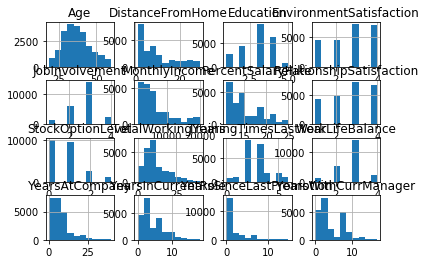

In [39]:
X.hist()


In [41]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [42]:
predictions = lm.predict(X)
print(predictions)

[2.83782034 2.83579805 2.83782034 ... 2.47805173 2.69408642 2.85716871]


In [43]:
lm.score(X,y)

0.006779156710510659

This is the R² score of our model. This the percentage of explained variance of the predictions. If you’re interested, read more here. Next, let’s check out the coefficients for the predictors:

In [45]:
lm.coef_

array([-2.56558362e-03, -2.70527259e-03, -1.30258512e-02, -2.72934489e-02,
       -3.35640034e-02,  3.79813543e-06,  6.11558114e-03, -1.31674713e-02,
        1.86785728e-02, -5.19381757e-03, -8.73347458e-03, -3.89558229e-02,
        1.10064632e-02,  9.37107293e-03, -8.74972672e-03, -2.17110508e-02])

In [46]:
lm.intercept_

3.135717546005135

In [47]:
df = X
target = y

In [48]:
X = sm.add_constant(X) # adding a constant (OLS can be done with/without adding a constant)

C:\Users\Karti\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [49]:
lr_model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = lr_model.predict(X)

# Print out the statistics
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        JobSatisfaction   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     9.932
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           1.69e-25
Time:                        12:23:20   Log-Likelihood:                -35241.
No. Observations:               23299   AIC:                         7.052e+04
Df Residuals:                   23282   BIC:                         7.065e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.1357      0.068     45.807      0.000       3.002       3.270
Age                         -0.0026      0.001     -2.998      0.003      -0.004      -0.001
DistanceFromHome            -0.0027      0.001     -3.041      0.002      -0.004      -0.001
Education                   -0.0130      0.007     -1.807      0.071      -0.027       0.001
EnvironmentSatisfaction     -0.0273      0.007     -4.145      0.000      -0.040      -0.014
JobInvolvement              -0.0336      0.010     -3.305      0.001      -0.053      -0.014
MonthlyIncome             3.798e-06   2.38e-06      1.594      0.111   -8.71e-07    8.47e-06
PercentSalaryHike            0.0061      0.002      3.104      0.002       0.002       0.010
RelationshipSatisfaction    -0.0132      0.007     -1.966      0.049      -0.026   -3.84e-05
StockOptionLevel             0.0187      0.008      2.198      0.028       0.002       0.035
TotalWorkingYears           -0.0052      0.002     -3.163      0.002      -0.008      -0.002
TrainingTimesLastYear       -0.0087      0.006     -1.562      0.118      -0.020       0.002
WorkLifeBalance             -0.0390      0.010     -3.805      0.000      -0.059      -0.019
YearsAtCompany               0.0110      0.002      4.524      0.000       0.006       0.016
YearsInCurrentRole           0.0094      0.003      2.876      0.004       0.003       0.016
YearsSinceLastPromotion     -0.0087      0.003     -3.035      0.002      -0.014      -0.003
YearsWithCurrManager        -0.0217      0.003     -6.484      0.000      -0.028      -0.015
==============================================================================
Omnibus:                    22194.936   Durbin-Watson:                   0.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1815.162
Skew:                          -0.322   Prob(JB):                         0.00
Kurtosis:                       1.793   Cond. No.                     7.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### *Note:
<em> the coefficient of the constant is same as "lm.intercept_" value that we had got above
<br/> p value of all the independent variables is low, which tells us that the relationship is significant (Even Randomforest told us the same thing)</em>

### c) Support Vector Regression
As in classification, support vector regression (SVR) is characterized by the use of kernels, sparse solution, and VC control of the margin and the number of support vectors. Although less popular than SVM, SVR has been proven to be an effective tool in real-value function estimation. As a supervised-learning approach, SVR trains using a symmetrical loss function, which equally penalizes high and low misestimates.

In [50]:
from sklearn import svm
from sklearn.metrics import r2_score, median_absolute_error
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score, learning_curve, GridSearchCV, train_test_split, learning_curve
from sklearn.feature_selection import RFECV

In [52]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X,y, random_state=20, test_size= 0.25)

In [53]:
svreg = svm.SVR(epsilon = 0.1, C = 80)
svreg.fit(X1_train,Y1_train)

C:\Users\Karti\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=80, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

C - float, optional (default=1.0)
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

epsilon - float, optional (default=0.1)
Epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [54]:
svreg.score(X1_train, Y1_train)

0.991808521876298

This returns the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [56]:
median_absolute_error(svreg.predict(X1_test), Y1_test)

0.10001533389792616

Median absolute error is essentially insensitive to outliers (as long as there aren't too many of them). This is because it is the median of all of the absolute values of the residuals, and the median is unaffected by values at the tails. So, this loss function can be used to perform robust regression.

In contrast, the mean squared error can be highly sensitive to outliers, and mean absolute error can be somewhat sensitive to outliers (although less so than the mean squared error).

Note that using the median absolute error only corrects for outliers in the response/target variable, not for outliers in the predictors/feature variables.

In [58]:
mse(svreg.predict(X1_test), Y1_test)

0.03254207819277171

measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value

Creating Feature Ranking DataFrame By Using Recursive Feature Elimination from sklearn

In [62]:
cv = ShuffleSplit(n_splits = 3, test_size=0.25, random_state=0)
selector = RFECV(gbr, cv= cv)
selector.fit(X1_train, Y1_train)

RFECV(cv=ShuffleSplit(n_splits=3, random_state=0, test_size=0.25, train_size=None),
      estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse',
                                          init=None, learning_rate=0.1,
                                          loss='ls', max_depth=3,
                                          max_features=None,
                                          max_leaf_nodes=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=100,
                                          n_iter_no_change=None, presort='auto',
                                          random_state=None, subsample=1.0,
                         

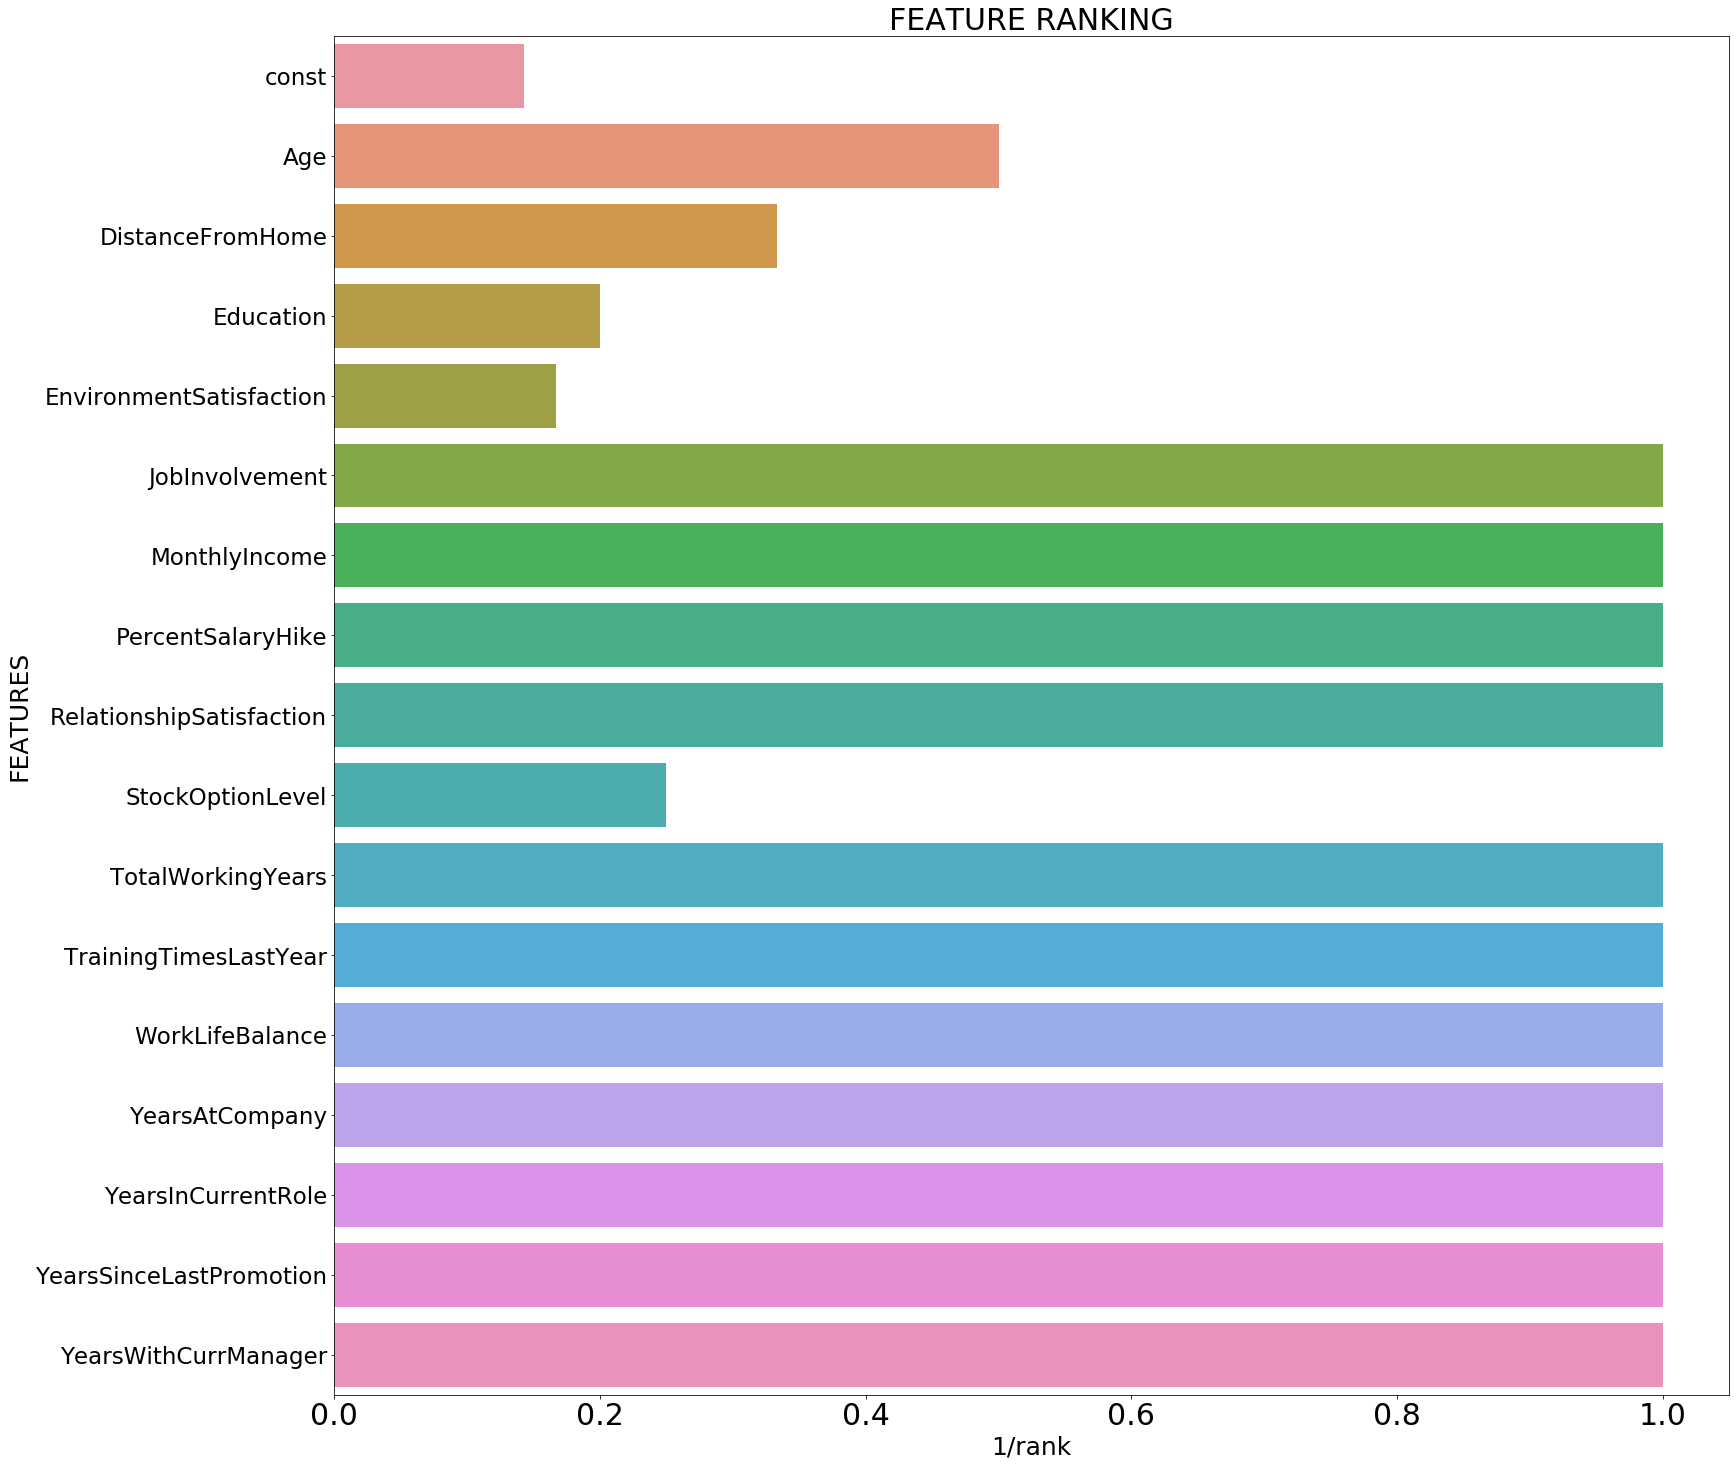

In [65]:
f, ax = plt.subplots(figsize= (25,25))
sns.barplot(x = (1/selector.ranking_), y = X1_train.columns)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 23)
plt.xlabel('1/rank', fontsize= 25)
plt.ylabel('FEATURES', fontsize= 25)
plt.title('FEATURE RANKING', fontsize =30)
plt.show()

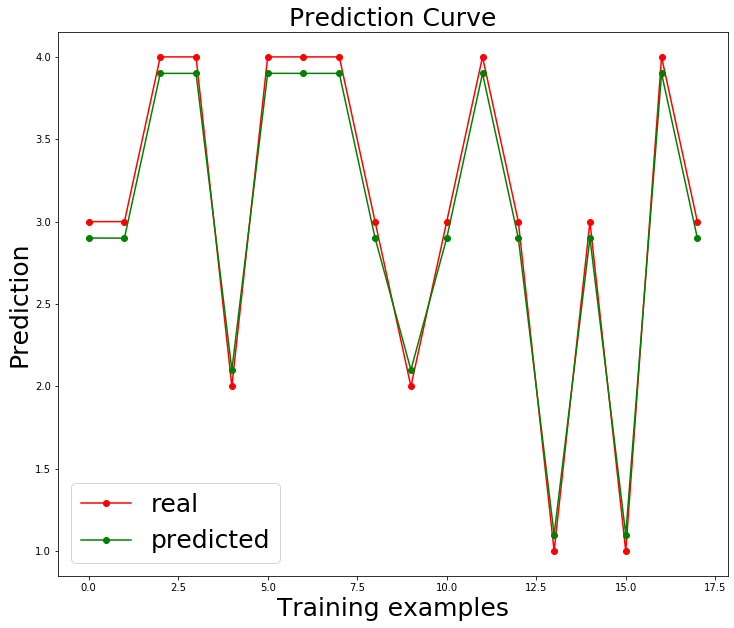

In [82]:
plt.figure(figsize=(12,10))
plt.title("Prediction Curve", fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X1_test[2:20].reset_index().index, Y1_test[2:20], 'o-', color = 'r', label = 'real')
plt.plot(X1_test[2:20].reset_index().index, svreg.predict(X1_test)[2:20] , 'o-', color = 'g', label = "predicted")
plt.legend(fontsize = 25)
plt.show()

## Conclusion

1) Is the relationship significant? <br/>
<em>Randomforest helped us in identifying the significant variables. We further validated the significance of these variables by getting a low p value in the OLS method and a high score (99%!) for the SVR.</em>

2) Are any model assumptions violated? <br/>
<em>Regression assumptions:<br/>
a) Linear relationship : Linear regression needs the relationship between the independent and dependent variables to be linear. This linearity assumption can best be tested with scatter plots. We have made the plot for Monthly Income and Job Satisfaction and verified it is linear.<br/>
b) Multivariate normality : Regression analysis requires all variables to be multivariate normal. This assumption can best be checked with a histogram or a Q-Q-Plot. We have plotted the histograms and verified this as well.<br/>
c) Multicollinearity : Regression assumes that there is little or no multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. You can use a correlation matrix to check if the variables are correlated to each other. We had removed some of the correlated variables as part of our data cleaning.<br/>
d)Autocorrelation : Regression analysis requires that there is little or no autocorrelation in the data. Autocorrelation occurs when the residuals are not independent from each other. While a scatterplot allows you to check for autocorrelations, you can test the linear regression model for autocorrelation with the Durbin-Watson test.<br/>
e)Homoscedasticity : Homoscedasticity describes a situation in which the error term is the same across all values of the independent variables. The scatter plot is good way to check whether the data are homoscedastic (meaning the residuals are equal across the regression line). If homoscedasticity is present, a non-linear correction might fix the problem.
The error terms must be normally distributed. In this case, as the plot above shows, the error term varies across the plot.</em>

3) Is there any multi-collinearity in the model? <br/>
<em>There was multicollinearity in the model. Columns like: DailyRate,HourlyRate,MonthlyIncome, MonthlyRate existed in the original dataset but we dealt with that. Some other correlations revealed through the correlation matrix were kept beacause the correlation was ambiguous.</em>

4) In the multivariate models are predictor variables independent of all the other predictor variables?<br/> 
<em>Most of the independent variables are independent of each other. However, there may be some small dependence ratio between YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager, YearsSinceLastPromotion</em>

5) Does the model make sense? <br/>
<em>Randomforest : Mean Absolute Error = 0.04<br/>
OLS : R-squared = 0.007<br/>
SVR : Mean squared error = 0.03<br/>
All these errors are very small and so we can safely say that our models make sense</em>

6) Does regularization help? <br/>
<em>A standard least squares model tends to have some variance in it, i.e. these models won’t generalize well for a data set different than its training data. Regularization has significantly reduced the variance of the model, without substantial increase in its bias</em>

7) Which independent variables are significant? <br/>
<em>Monthly Income, Percent Salary Hike, JobInvolvement, YearsSinceLastPromotion</em>

8) Which hyperparameters are important? <br/>
<em>Randomforest: N_Estimators<br/>
OLS: there is none<br/>
SVR: C, epsilon</em>

Important Citations:
https://towardsdatascience.com/linear-regression-python-implementation-ae0d95348ac4 
https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4 https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9  
https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html https://www.kaggle.com/patilaum/exploring-sklearn-with-regression-techniques 


Copyright 2020 Kartik Kumar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.